In [1]:
# Water temperature validation


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import xarray as xray
from datetime import datetime
import pandas as pd
import os

import soda.utils.mysignal as sp
from soda.utils.timeseries import timeseries
from soda.dataio.suntans.sunprofile import Profile
from soda.utils.maptools import ll2utm
from soda.utils.modvsobs import ModVsObs
from soda.dataio import netcdfio
import soda.dataio as io
from soda.utils.myproj import MyProj


#from octant.tools import isoslice
from mycurrents import oceanmooring as om

from matplotlib import rcParams

#rcParams['font.family'] = 'sans-serif'
#rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
#rcParams['font.serif'] = ['Bitstream Vera Sans']

In [2]:
rcParams["font.size"] = "14"
rcParams['axes.labelsize']='large'

In [12]:
basedir = '/home/suntans/Share/ARCHub/'
Tfile = '{}/DATA/FIELD/IMOS/processed_data/IMOS_Gridded_Mooring_T_QC.nc'.format(basedir)


# SUNTANS profile netcdf file
sunfile = '../SCENARIOS/OUTPUT_NWS_2km_GLORYS_hex_2013_2014/NWS_2km_GLORYS_hex_2013_2014_Nk80dt60_Profile.nc'

In [54]:
def get_suntans_mo(X,Y, Uobs, sunTS, sunvar, units):
    """
    Get the suntans evuivalent points
    """
    Umod_xray = sunTS(X, Y, -Uobs.Z, sunvar, zinterp='nearest')
    # Convert SUNTANS timeseries to an ocean mooring object
    Umod = om.OceanMooring(Umod_xray.time.values, Umod_xray.values.squeeze(),\
        Uobs.Z, zinterp='linear')

    return ModVsObs(Umod.t, Umod.y, Uobs.t, Uobs.y, \
            Z=Uobs.Z, units=units, varname=sunvar), Umod

def compare_imos_suntans_temp(sunfile, Tfile, stationT, plot=True):
    print(72*'#')
    print('#\t Station: %s'%stationT)
    #print 'Loading the suntans profile...'
    sunTS = Profile(sunfile)
    sunTS
    ##########
    # Load the 400 and 200 m velocity and temperature data
    ##########
    #print 'Loading mooring data...'

    Tobs = om.from_netcdf(Tfile, 'watertemp', group=stationT)
    #Tobs.X, Tobs.Y
    
    # Set the project
    P = MyProj('merc')
    xstation, ystation = P.to_xy(Tobs.X,Tobs.Y)
    #xstation, ystation
    
    #print 'Grabbing suntans points...'
    mo_T, Umod = get_suntans_mo(xstation, ystation, Tobs, sunTS, 'temp', 'degC')
    
    return mo_T, Umod

#     if plot:
#         mo_T.printStatsZ()

#         # Filter and  Convert to oceanmooring objects
#         dsobs = om.OceanMooring(mo_T.TSobs.t, mo_T.TSobs.filt_uneven(34*3600.,order=3), -mo_T.TSobs.Z, positive='down')
#         dsmod = om.OceanMooring(mo_T.TSmod.t, mo_T.TSmod.filt_uneven(34*3600.,order=3), -mo_T.TSmod.Z, positive='down')
#         ####
#         # Plot
#         plt.figure(figsize=(8,9))
#         ax1=plt.subplot2grid((3,3),(0,0),colspan=3)
#         dsobs.contourf(np.arange(7,32,1))
#         plt.ylabel('Depth')
#         ax1.set_xticklabels([])

#         ax2=plt.subplot2grid((3,3),(1,0),colspan=3)
#         dsmod.contourf(np.arange(7,32,1))
#         plt.ylabel('Depth [m]')

def plot_stats(mo_T,ax3,ax4,ax5):
        # Mean temp
        #ax3=plt.subplot2grid((3,3),(2,0),colspan=1)
        #ax3.sca(ax3)
        ax3.plot(mo_T.meanMod, mo_T.Z,'ro')
        ax3.plot(mo_T.meanObs, mo_T.Z,'bo')
        #ax3.xlabel('Temperature [$^{\circ}$C]')
        #ax3.ylabel('Depth [m]')
        #ax3.grid(b=True)
        #plt.xlim([7,30])
        #plt.legend(('Mod.','Obs.'), loc='upper left')

        # Bias
        #ax4=plt.subplot2grid((3,3),(2,1),colspan=1)
        #plt.sca(ax4)
        ax4.plot(mo_T.bias, mo_T.Z,'ko')
        #plt.xlim(-2.25,2.25)
        #         ax4.set_xticks([-2,-1,0,1,2])
        #         ax4.set_yticklabels([])
        #         plt.xlabel('Bias [$^{\circ}$C]')
        #         plt.grid(b=True)


        # RMSE
        #ax5=plt.subplot2grid((3,3),(2,2),colspan=1)
        plt.sca(ax5)
        ax5.plot(mo_T.rmse, mo_T.Z,'ko')
        #         plt.xlim(-3,3)
        #         ax5.set_yticklabels([])
        #         plt.xlabel('RMSE [$^{\circ}$C]')
        #         plt.grid(b=True)

#         plt.tight_layout()
        
#         plt.savefig('../FIGURES/IMOS_v_SUNTANS_%s.png'%stationT, dpi=150)
#         plt.show()
    


########################################################################
#	 Station: KIM400_2013_b
########################################################################
#	 Station: KIM400_2014_a
########################################################################
#	 Station: KIM400_2014_a


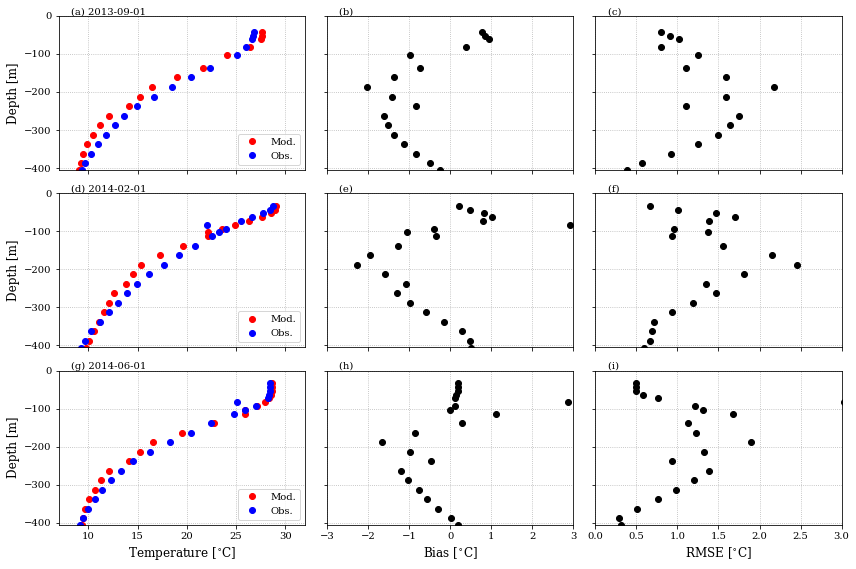

In [74]:

groups = ['KIM400_2013_b', 'KIM400_2014_a','KIM400_2014_a']
t0s = ['2013-09-01','2014-02-01','2014-06-01']
t1s = ['2013-10-01','2014-03-01','2014-07-01']
zmax = -405
sitename = 'KIM400'

plt.figure(figsize=(12,8))

ii=0
for group, t0, t1 in zip(groups, t0s, t1s):
    ax3=plt.subplot2grid((3,3),(ii,0),colspan=1)
    plt.grid(b=True,ls=':')
    
    ax4=plt.subplot2grid((3,3),(ii,1),colspan=1)
    plt.grid(b=True,ls=':')

    ax5=plt.subplot2grid((3,3),(ii,2),colspan=1)
    plt.grid(b=True,ls=':')

    mo, T = compare_imos_suntans_temp(sunfile, Tfile, group)
    mo_c = mo.clip(t0,t1)
    plot_stats(mo_c,ax3,ax4,ax5)

    if ii < 2:
        ax3.set_xticklabels([])
        ax4.set_xticklabels([])
        ax5.set_xticklabels([])
    
    ax4.set_yticklabels([])
    ax5.set_yticklabels([])
    ax3.set_xlim(7,32)
    ax4.set_xlim(-3,3)
    ax5.set_xlim(0,3)
    ax3.set_ylabel('Depth [m]')
    ax3.set_ylim(zmax,0)
    ax4.set_ylim(zmax,0)
    ax5.set_ylim(zmax,0)
    ax3.legend(('Mod.','Obs.'), loc='lower right')
    
    labela = '({}) {}'.format(chr(97+3*ii), t0)
    labelb = '({}) '.format(chr(97+3*ii+1))
    labelc = '({}) '.format(chr(97+3*ii+2))
    
    ax3.text(0.05,1.01, labela, transform=ax3.transAxes)
    ax4.text(0.05,1.01, labelb, transform=ax4.transAxes)
    ax5.text(0.05,1.01, labelc, transform=ax5.transAxes)
    
    ii+=1
    
    
#
ax3.set_xlabel('Temperature [$^{\circ}$C]')
ax4.set_xlabel('Bias [$^{\circ}$C]')
ax5.set_xlabel('RMSE [$^{\circ}$C]')
plt.tight_layout()

plt.savefig('../FIGURES/suntans_imos_validation_{}_temp.png'.format(sitename), dpi=150)
plt.savefig('../FIGURES/suntans_imos_validation_{}_temp.pdf'.format(sitename), dpi=150)

########################################################################
#	 Station: ITFTIS_2013_b
########################################################################
#	 Station: ITFTIS_2014_a
########################################################################
#	 Station: ITFTIS_2014_a


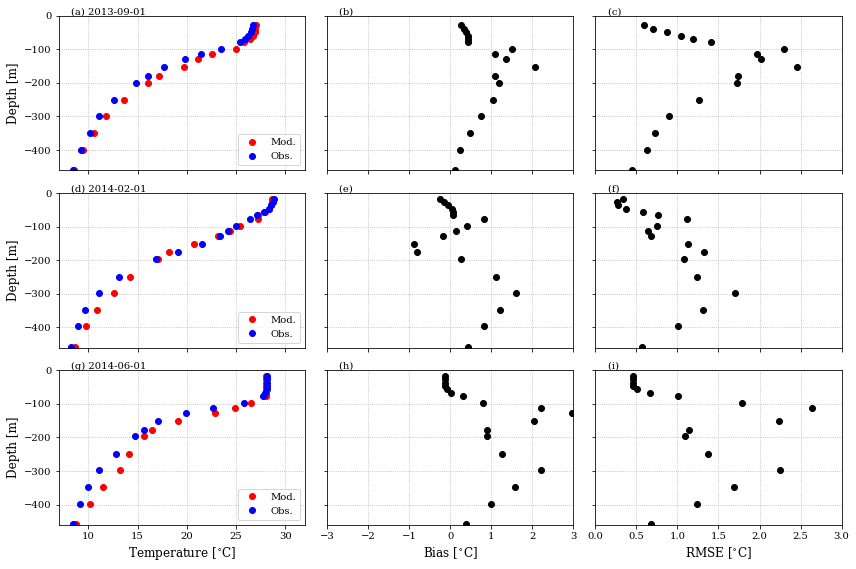

In [75]:
groups = ['ITFTIS_2013_b', 'ITFTIS_2014_a','ITFTIS_2014_a']
t0s = ['2013-09-01','2014-02-01','2014-06-01']
t1s = ['2013-10-01','2014-03-01','2014-07-01']
zmax=-460
sitename = 'ITFTIS'

plt.figure(figsize=(12,8))

ii=0
for group, t0, t1 in zip(groups, t0s, t1s):
    ax3=plt.subplot2grid((3,3),(ii,0),colspan=1)
    plt.grid(b=True,ls=':')
    
    ax4=plt.subplot2grid((3,3),(ii,1),colspan=1)
    plt.grid(b=True,ls=':')

    ax5=plt.subplot2grid((3,3),(ii,2),colspan=1)
    plt.grid(b=True,ls=':')

    mo, T = compare_imos_suntans_temp(sunfile, Tfile, group)
    mo_c = mo.clip(t0,t1)
    plot_stats(mo_c,ax3,ax4,ax5)

    if ii < 2:
        ax3.set_xticklabels([])
        ax4.set_xticklabels([])
        ax5.set_xticklabels([])
    
    ax4.set_yticklabels([])
    ax5.set_yticklabels([])
    ax3.set_xlim(7,32)
    ax4.set_xlim(-3,3)
    ax5.set_xlim(0,3)
    ax3.set_ylabel('Depth [m]')
    ax3.set_ylim(zmax,0)
    ax4.set_ylim(zmax,0)
    ax5.set_ylim(zmax,0)
    ax3.legend(('Mod.','Obs.'), loc='lower right')
    
    labela = '({}) {}'.format(chr(97+3*ii), t0)
    labelb = '({}) '.format(chr(97+3*ii+1))
    labelc = '({}) '.format(chr(97+3*ii+2))
    
    ax3.text(0.05,1.01, labela, transform=ax3.transAxes)
    ax4.text(0.05,1.01, labelb, transform=ax4.transAxes)
    ax5.text(0.05,1.01, labelc, transform=ax5.transAxes)
    
    ii+=1
    
    
#
ax3.set_xlabel('Temperature [$^{\circ}$C]')
ax4.set_xlabel('Bias [$^{\circ}$C]')
ax5.set_xlabel('RMSE [$^{\circ}$C]')
plt.tight_layout()

plt.savefig('../FIGURES/suntans_imos_validation_{}_temp.png'.format(sitename), dpi=150)
plt.savefig('../FIGURES/suntans_imos_validation_{}_temp.pdf'.format(sitename), dpi=150)

########################################################################
#	 Station: PIL200_2013_b
########################################################################
#	 Station: PIL200_2014_a
########################################################################
#	 Station: PIL200_2014_a


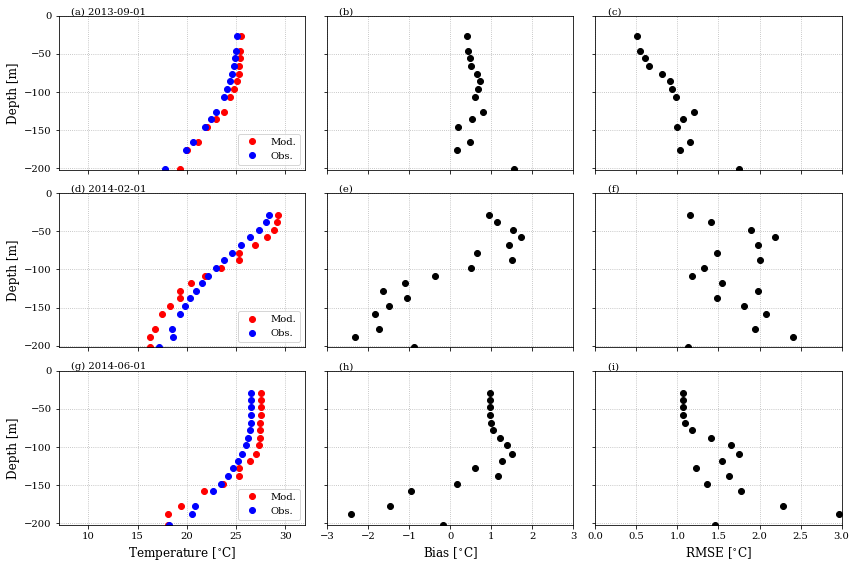

In [76]:
groups = ['PIL200_2013_b', 'PIL200_2014_a','PIL200_2014_a']
t0s = ['2013-09-01','2014-02-01','2014-06-01']
t1s = ['2013-10-01','2014-03-01','2014-07-01']
zmax=-202
sitename = 'PIL200'

plt.figure(figsize=(12,8))

ii=0
for group, t0, t1 in zip(groups, t0s, t1s):
    ax3=plt.subplot2grid((3,3),(ii,0),colspan=1)
    plt.grid(b=True,ls=':')
    
    ax4=plt.subplot2grid((3,3),(ii,1),colspan=1)
    plt.grid(b=True,ls=':')

    ax5=plt.subplot2grid((3,3),(ii,2),colspan=1)
    plt.grid(b=True,ls=':')

    mo, T = compare_imos_suntans_temp(sunfile, Tfile, group)
    mo_c = mo.clip(t0,t1)
    plot_stats(mo_c,ax3,ax4,ax5)

    if ii < 2:
        ax3.set_xticklabels([])
        ax4.set_xticklabels([])
        ax5.set_xticklabels([])
    
    ax4.set_yticklabels([])
    ax5.set_yticklabels([])
    ax3.set_xlim(7,32)
    ax4.set_xlim(-3,3)
    ax5.set_xlim(0,3)
    ax3.set_ylabel('Depth [m]')
    ax3.set_ylim(zmax,0)
    ax4.set_ylim(zmax,0)
    ax5.set_ylim(zmax,0)
    ax3.legend(('Mod.','Obs.'), loc='lower right')
    
    labela = '({}) {}'.format(chr(97+3*ii), t0)
    labelb = '({}) '.format(chr(97+3*ii+1))
    labelc = '({}) '.format(chr(97+3*ii+2))
    
    ax3.text(0.05,1.01, labela, transform=ax3.transAxes)
    ax4.text(0.05,1.01, labelb, transform=ax4.transAxes)
    ax5.text(0.05,1.01, labelc, transform=ax5.transAxes)
    
    ii+=1
    
    
#
ax3.set_xlabel('Temperature [$^{\circ}$C]')
ax4.set_xlabel('Bias [$^{\circ}$C]')
ax5.set_xlabel('RMSE [$^{\circ}$C]')
plt.tight_layout()

plt.savefig('../FIGURES/suntans_imos_validation_{}_temp.png'.format(sitename), dpi=150)
plt.savefig('../FIGURES/suntans_imos_validation_{}_temp.pdf'.format(sitename), dpi=150)

########################################################################
#	 Station: KIM200_2013_b
########################################################################
#	 Station: KIM200_2014_a
########################################################################
#	 Station: KIM200_2014_a


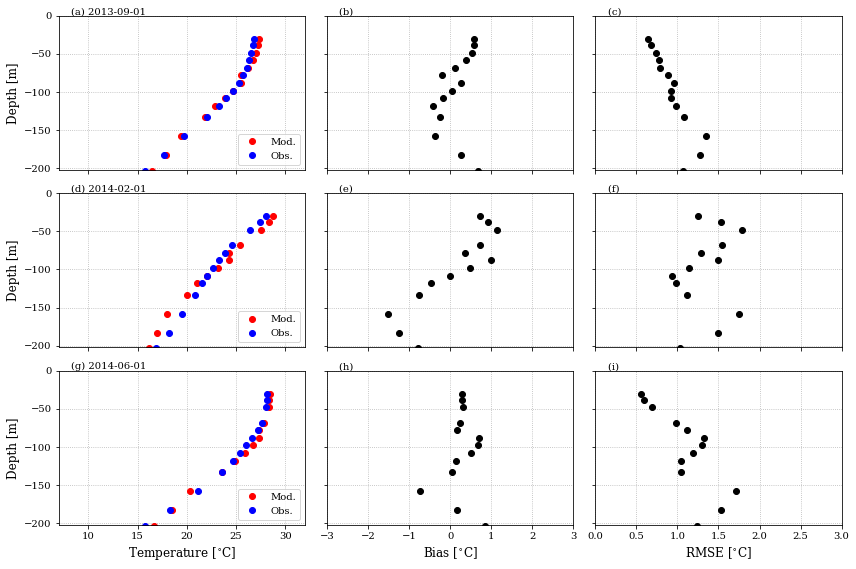

In [77]:
groups = ['KIM200_2013_b', 'KIM200_2014_a','KIM200_2014_a']
t0s = ['2013-09-01','2014-02-01','2014-06-01']
t1s = ['2013-10-01','2014-03-01','2014-07-01']
zmax=-202
sitename = 'KIM200'

plt.figure(figsize=(12,8))

ii=0
for group, t0, t1 in zip(groups, t0s, t1s):
    ax3=plt.subplot2grid((3,3),(ii,0),colspan=1)
    plt.grid(b=True,ls=':')
    
    ax4=plt.subplot2grid((3,3),(ii,1),colspan=1)
    plt.grid(b=True,ls=':')

    ax5=plt.subplot2grid((3,3),(ii,2),colspan=1)
    plt.grid(b=True,ls=':')

    mo, T = compare_imos_suntans_temp(sunfile, Tfile, group)
    mo_c = mo.clip(t0,t1)
    plot_stats(mo_c,ax3,ax4,ax5)

    if ii < 2:
        ax3.set_xticklabels([])
        ax4.set_xticklabels([])
        ax5.set_xticklabels([])
    
    ax4.set_yticklabels([])
    ax5.set_yticklabels([])
    ax3.set_xlim(7,32)
    ax4.set_xlim(-3,3)
    ax5.set_xlim(0,3)
    ax3.set_ylabel('Depth [m]')
    ax3.set_ylim(zmax,0)
    ax4.set_ylim(zmax,0)
    ax5.set_ylim(zmax,0)
    ax3.legend(('Mod.','Obs.'), loc='lower right')
    
    labela = '({}) {}'.format(chr(97+3*ii), t0)
    labelb = '({}) '.format(chr(97+3*ii+1))
    labelc = '({}) '.format(chr(97+3*ii+2))
    
    ax3.text(0.05,1.01, labela, transform=ax3.transAxes)
    ax4.text(0.05,1.01, labelb, transform=ax4.transAxes)
    ax5.text(0.05,1.01, labelc, transform=ax5.transAxes)
    
    ii+=1
    
    
#
ax3.set_xlabel('Temperature [$^{\circ}$C]')
ax4.set_xlabel('Bias [$^{\circ}$C]')
ax5.set_xlabel('RMSE [$^{\circ}$C]')
plt.tight_layout()

plt.savefig('../FIGURES/suntans_imos_validation_{}_temp.png'.format(sitename), dpi=150)
plt.savefig('../FIGURES/suntans_imos_validation_{}_temp.pdf'.format(sitename), dpi=150)